In [29]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
with open('match_1.json', 'r') as json_file:
    data1 = json.load(json_file)

with open('match_2.json', 'r') as json_file:
    data2 = json.load(json_file)


In [31]:
match_1 = pd.DataFrame(data1)
match_2 = pd.DataFrame(data2)

In [32]:
match_1


,label,norm
0,walk,"[23.177037336396975, 23.36152528524938, 21.535..."
1,walk,"[20.998214383911275, 19.182798059840767, 18.27..."
2,walk,"[21.95259682019565, 20.62720484424047, 22.5554..."
3,walk,"[19.39209748358647, 19.30460665293087, 18.9787..."
4,rest,"[22.069263037713093, 19.672270483203395, 19.88..."
...,...,...
569,walk,"[21.245737438782683, 21.938836193196945, 21.24..."
570,walk,"[20.272347748199333, 21.820302584302983, 21.21..."
571,run,"[90.21306005395827, 72.12712844635696, 63.5643..."
572,tackle,"[44.79510251441832, 27.26406867633046, 88.6164..."


In [33]:
match_1.describe()

,label,norm
count,574,574
unique,8,574
top,walk,"[23.177037336396975, 23.36152528524938, 21.535..."
freq,245,1


In [34]:
match_2

,label,norm
0,no action,"[104.42423889328715, 87.63989343949717, 128.52..."
1,run,"[108.03112639951678, 92.57566083451651, 81.303..."
2,pass,"[17.837163554142162, 39.435455203974186, 51.64..."
3,rest,"[21.91843920469922, 18.11914155706377, 21.7137..."
4,walk,"[20.86063916182152, 17.8097748446304, 14.35537..."
...,...,...
608,walk,"[23.337305769963503, 20.210987911153104, 25.06..."
609,walk,"[22.470322813933603, 22.552427730975246, 23.84..."
610,walk,"[43.833612705797144, 46.18045998580312, 37.492..."
611,walk,"[30.927599255773355, 31.26358258808756, 28.286..."


In [35]:
match_2.describe()



,label,norm
count,613,613
unique,9,613
top,run,"[104.42423889328715, 87.63989343949717, 128.52..."
freq,343,1


In [36]:
print(f"****number of actions for the first game**** \n" ,match_1['label'].value_counts())
print(f"****number of actions for the second game**** \n" ,match_2['label'].value_counts())

****number of actions for the first game**** 
 walk       245
run        209
dribble     42
rest        25
pass        24
tackle      20
shot         6
cross        3
Name: label, dtype: int64
****number of actions for the second game**** 
 run          343
walk         190
dribble       36
shot          12
tackle        11
rest          10
pass           8
no action      2
cross          1
Name: label, dtype: int64


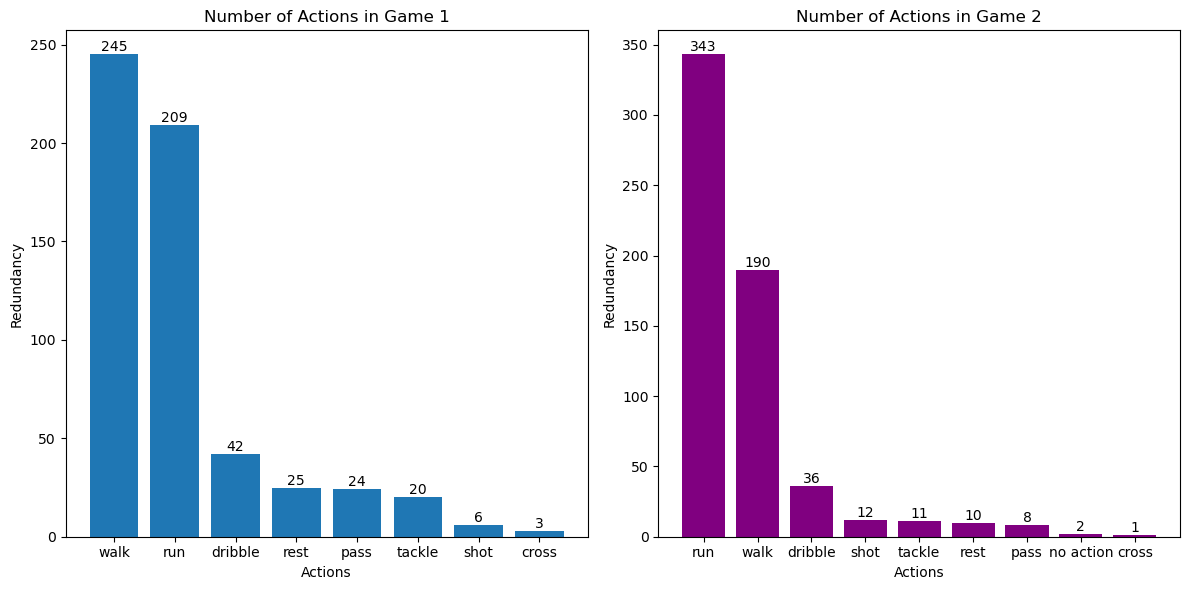

In [45]:
redondancies_game_1 = match_1['label'].value_counts().reset_index()
redondancies_game_1.columns = ['Action', 'redondancy']

# Calculate redundancies for game 2
redondancies_game_2 = match_2['label'].value_counts().reset_index()
redondancies_game_2.columns = ['Action', 'redondancy']

# Create subplots for game 1 and game 2
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Game 1
axes[0].bar(redondancies_game_1['Action'], redondancies_game_1['redondancy'])
axes[0].set_xlabel('Actions')
axes[0].set_ylabel('Redundancy')
axes[0].set_title('Number of Actions in Game 1')
for index, row in redondancies_game_1.iterrows():
    axes[0].text(row['Action'], row['redondancy'], str(row['redondancy']), ha='center', va='bottom')

# Game 2
axes[1].bar(redondancies_game_2['Action'], redondancies_game_2['redondancy'], color='purple')
axes[1].set_xlabel('Actions')
axes[1].set_ylabel('Redundancy')
axes[1].set_title('Number of Actions in Game 2')
for index, row in redondancies_game_2.iterrows():
    axes[1].text(row['Action'], row['redondancy'], str(row['redondancy']), ha='center', va='bottom')

plt.tight_layout()
plt.show()

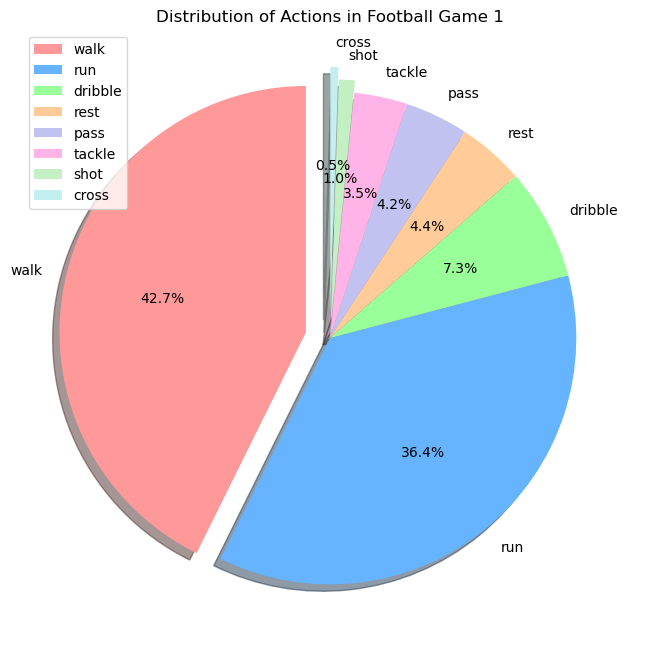

In [38]:
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#c2f0f0']
labels = redondancies_game_1['Action']
sizes = redondancies_game_1['redondancy']

# Explode a slice if needed (for emphasis)
explode = (0.1, 0, 0, 0, 0, 0, 0.05, 0.1)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True)

# Add a title
plt.title('Distribution of Actions in Football Game 1')

# Display the legend
plt.legend(loc="upper left")

# Show the pie chart
plt.show()

In [39]:

match_1['avg'] = match_1['norm'].apply(lambda x: np.mean(x))
match_1['std'] = match_1['norm'].apply(lambda x: np.std(x))
match_1['max'] = match_1['norm'].apply(lambda x: np.max(x))
match_1['min'] = match_1['norm'].apply(lambda x: np.min(x))
match_1['sum'] = match_1['norm'].apply(lambda x: np.sum(x))
match_1['quantile_75_25'] = match_1['norm'].apply(lambda x: np.quantile(x, q=0.75) - np.quantile(x, q=0.25))


for q in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    match_1[f'quantile_{q}'] = match_1['norm'].apply(lambda x: np.quantile(x, q=q))

print(match_1)    

      label                                               norm        avg  \
0      walk  [23.177037336396975, 23.36152528524938, 21.535...  24.166958   
1      walk  [20.998214383911275, 19.182798059840767, 18.27...  26.026276   
2      walk  [21.95259682019565, 20.62720484424047, 22.5554...  23.998177   
3      walk  [19.39209748358647, 19.30460665293087, 18.9787...  22.596573   
4      rest  [22.069263037713093, 19.672270483203395, 19.88...  20.378778   
..      ...                                                ...        ...   
569    walk  [21.245737438782683, 21.938836193196945, 21.24...  23.937046   
570    walk  [20.272347748199333, 21.820302584302983, 21.21...  30.876426   
571     run  [90.21306005395827, 72.12712844635696, 63.5643...  59.019320   
572  tackle  [44.79510251441832, 27.26406867633046, 88.6164...  81.714981   
573     run  [21.329404003070557, 27.39475495646987, 43.789...  33.758797   

            std         max        min          sum  quantile_75_25  \
0   

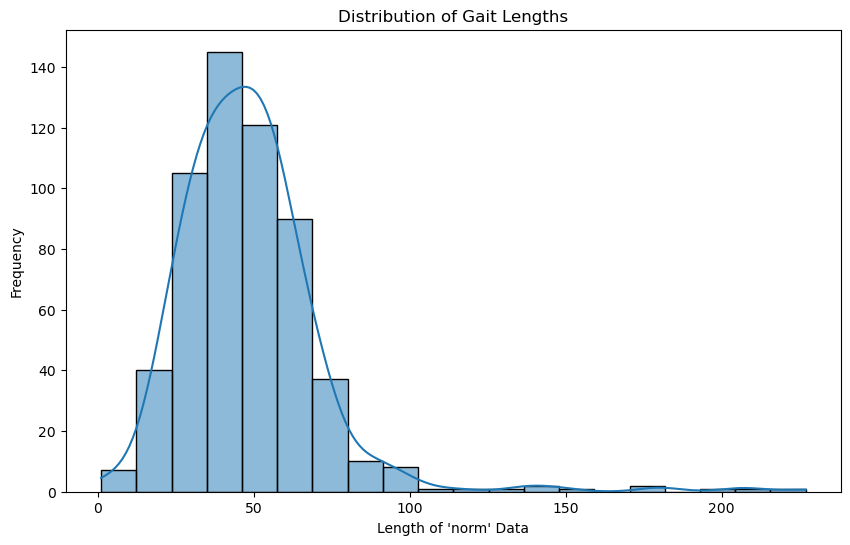

In [40]:
# Visualize the distribution of gait lengths

gait_lengths = match_1["norm"].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(gait_lengths, bins=20, kde=True)
plt.title("Distribution of Gait Lengths")
plt.xlabel("Length of 'norm' Data")
plt.ylabel("Frequency")
plt.show()



In [41]:
# Calculate gait lengths and group by action
match_1['gait_length'] = match_1['norm'].apply(len)
average_gait_length_per_action = match_1.groupby('label')['gait_length'].mean().reset_index().round(2)
print("Average Gait Length per Action for Match 1:")
print(average_gait_length_per_action)


match_2['gait_length'] = match_2['norm'].apply(len)
average_gait_length_per_action = match_2.groupby('label')['gait_length'].mean().reset_index().round(2)
print("Average Gait Length per Action for Match 2:")
print(average_gait_length_per_action)

Average Gait Length per Action for Match 1:
     label  gait_length
0    cross        60.00
1  dribble        41.60
2     pass        40.12
3     rest        89.52
4      run        38.33
5     shot        27.83
6   tackle        44.20
7     walk        55.74
Average Gait Length per Action for Match 2:
       label  gait_length
0      cross        30.00
1    dribble        36.53
2  no action       134.00
3       pass        50.38
4       rest       181.40
5        run        37.25
6       shot        36.75
7     tackle        49.91
8       walk        54.79


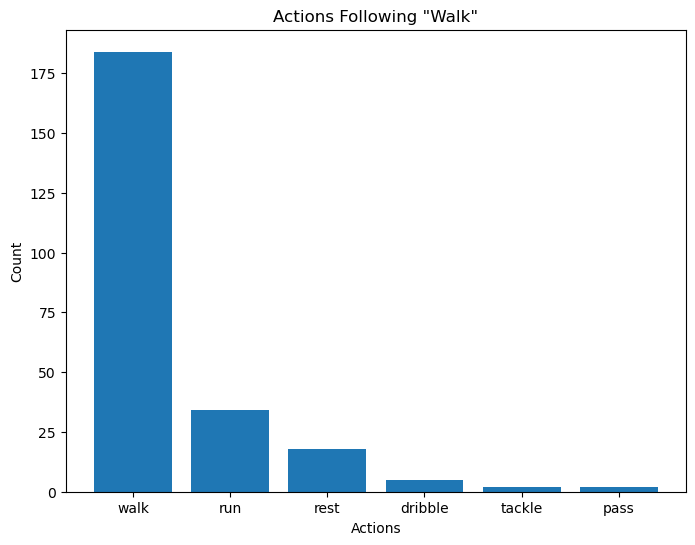

In [42]:
walk_indices = match_1[match_1['label'] == 'walk'].index
following_actions = match_1.loc[walk_indices + 1, 'label']

# Plot the actions that follow "walk"
plt.figure(figsize=(8, 6))
plt.bar(following_actions.value_counts().index, following_actions.value_counts())
plt.xlabel('Actions')
plt.ylabel('Count')
plt.title('Actions Following "Walk"')
plt.show()

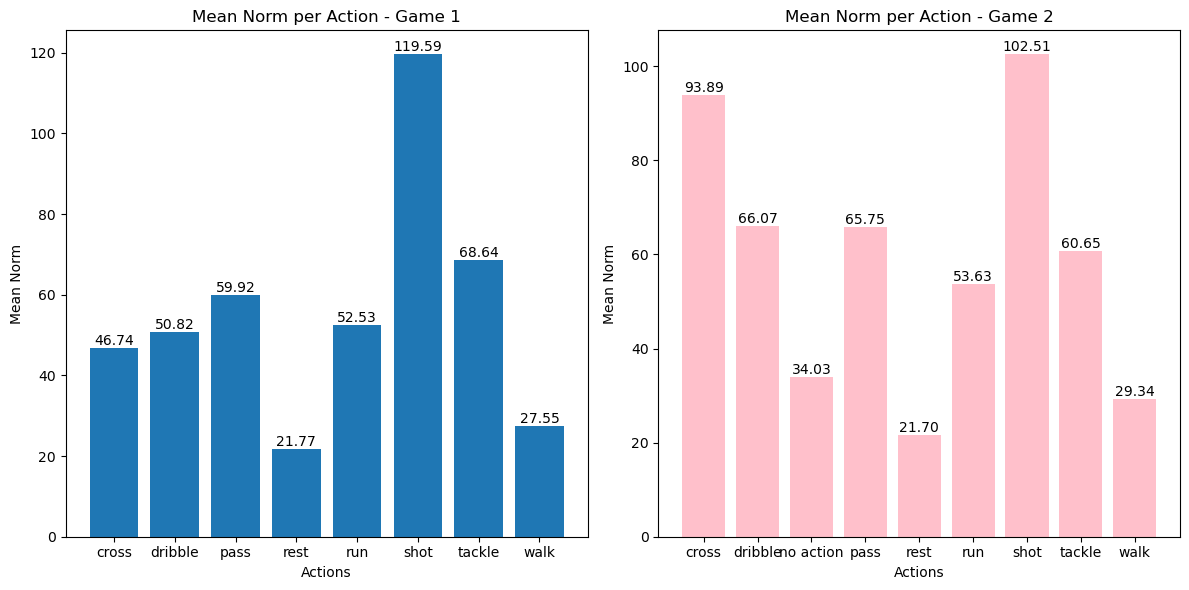

In [43]:
# Calculate the mean norm per action for game 1
mean_norm_per_action_1 = match_1.groupby('label')['norm'].apply(lambda x: sum(x, [])).apply(lambda x: sum(x)/len(x))

# Calculate the mean norm per action for game 2
mean_norm_per_action_2 = match_2.groupby('label')['norm'].apply(lambda x: sum(x, [])).apply(lambda x: sum(x)/len(x))

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the mean norm per action for game 1
ax1.bar(mean_norm_per_action_1.index, mean_norm_per_action_1.values)
ax1.set_xlabel('Actions')
ax1.set_ylabel('Mean Norm')
ax1.set_title('Mean Norm per Action - Game 1')

# Add the values to each bar for game 1
for i, v in enumerate(mean_norm_per_action_1.values):
    ax1.text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Plot the mean norm per action for game 2
ax2.bar(mean_norm_per_action_2.index, mean_norm_per_action_2.values, color='pink')
ax2.set_xlabel('Actions')
ax2.set_ylabel('Mean Norm')
ax2.set_title('Mean Norm per Action - Game 2')

# Add the values to each bar for game 2
for i, v in enumerate(mean_norm_per_action_2.values):
    ax2.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

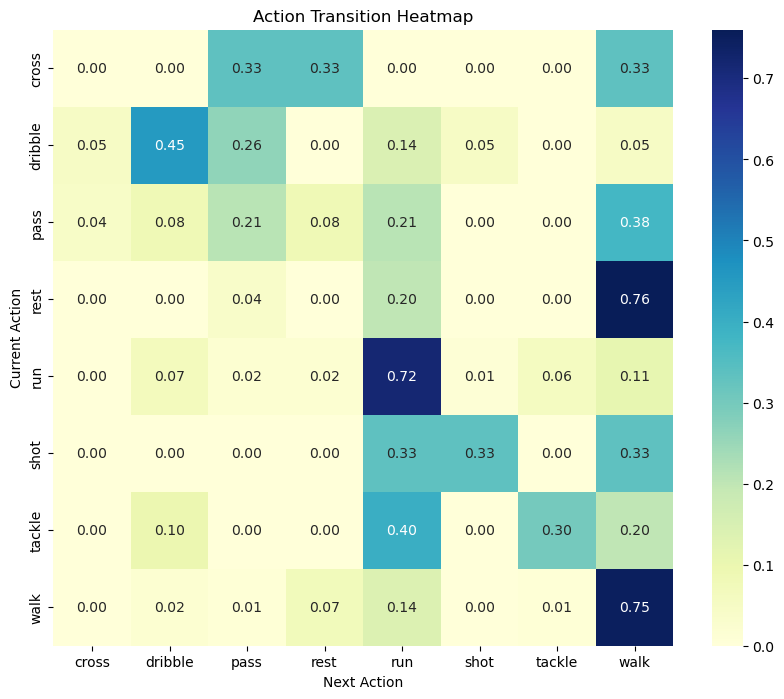

In [44]:
transition_matrix = pd.crosstab(match_1['label'], match_1['label'].shift(-1), normalize='index')

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(transition_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.xlabel('Next Action')
plt.ylabel('Current Action')
plt.title('Action Transition Heatmap')
plt.show()

there are some non logical transitions, for instance we have a `pass` following a `cross` . this is maybe due he 0.02-second sampling rate can lead to very fine-grained data, and it's possible that the sensor is detecting minor changes in movement that are leading to different action predictions in rapid succession.
we could consider applying a filter or smoothing technique to the data.